## Исследование объявлений о продаже квартир

### Цель проекта: научиться определять рыночную стоимость объектов недвижимости.

### Задачи

- Изучить время продажи квартиры. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Какие факторы больше всего влияют на стоимость квартиры? Зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
- Посчитать среднюю цену квадратного метра в десяти населённых пунктах, где число объявлений больше всего. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. 
- Выяснить, какая область входит в центр. Посчитать среднюю цену для каждого километра. Построить график зависимости цены от удаленности от центра.
- Выделите сегмент квартир в центре, изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Отличаются ли они от общих выводов по всему городу?


In [1]:
import pandas as pd
from pymystem3 import Mystem
m = Mystem()
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv()

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Таблица состоит из 21 столбца и 23699 записями. Имеются разные типы данных. Так же есть пропущенные значения. 

Начнем с изучения пропусков.

In [5]:
#Высота потолков, это важный и необходимый параметр, так как он влияет на стоимость квартир. 
data['ceiling_height'].unique()


array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Можно заметить, что есть не только пропущенные значения, которых более 9 тысяч, но и неправдоподобные, к примеру, очень низкие квартиры 1м высотой и даже есть 100 метровая, в высоту, квартира. Для начала разберемся с неправдоподобными значениями. В некоторых значениях неправильно проставлен или не стоит вовсе разделитель дробной части, к примеру 27, скорее это 2.7 метра. 

In [6]:
data[data['ceiling_height'] >= 20]['ceiling_height']

355       25.0
3148      32.0
4643      25.0
4876      27.0
5076      24.0
5246      27.0
5669      26.0
5807      27.0
6246      25.0
9379      25.0
10773     27.0
11285     25.0
14382     25.0
17496     20.0
17857     27.0
18545     25.0
20478     27.0
20507     22.6
21377     27.5
21824     27.0
22336     32.0
22869    100.0
22938     27.0
Name: ceiling_height, dtype: float64

In [7]:
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 32), 'ceiling_height'] = data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 32), 'ceiling_height'] / 10

In [8]:
#data[data['ceiling_height'] == 14]

In [9]:
#data[data['floors_total'] == 14]['ceiling_height'].describe()

In [10]:
#data[data['total_area'] == 56.4]['ceiling_height'].describe()

Значение высоты потолков равное 14 метров. Это явно ошибка записи, скорее всего это второй раз указано значения количества этажей в доме. Так же косвенным фактором служит то, что стоимость квартиры небольшая, как и площадь. Это не могут быть "хоромы". 
Проанализировав дома с такой же этажностью, а так же квартиры с такой же площадью (Обычно, если это стандартная планировка и стандартная серия дома, то высота потолков у них не сильно разнится) была выявлена единая медиана в 2.6 метра, именно этим значением заменяем наши 14 метров. 

In [11]:
data['ceiling_height'] = data['ceiling_height'].replace(14,2.6)

In [12]:
#data[data['ceiling_height'] == 10.3]

In [13]:
#data[data['floors_total'] == 16.0]['ceiling_height'].describe()

In [14]:
#data[(data['cityCenters_nearest'] == 11936.0) & (data['floors_total'] == 16.0) & (data['rooms'] == 1)]['ceiling_height'].describe()

In [15]:
data['ceiling_height'] = data['ceiling_height'].replace(10.3,2.8)

Выше было исправленно значение 10.3 на 2.8, мне удалость найти 3 таких квартиры в одном доме и их потолки равны 2.8 метра.

In [16]:
# Это так же недорогая квартира, скорее тут не 8.3, а упущена 2, т.e 2.83. Предлагаю заменить на 2.8
#data[data['ceiling_height'] == 8.3]

In [17]:
data['ceiling_height'] = data['ceiling_height'].replace(8.3,2.8)

In [18]:
# Посмотрев эти квартиры можно заметить, что не 8 метров высота потолков, а 2.8
data['ceiling_height'] = data['ceiling_height'].replace(8,2.8)

Квартиры до 5 метров это не редкость. А вот более 5 метров это, как правило, дорогостоящие квартиры. Проверим все ли данные в порядке.

In [19]:
data.query('ceiling_height >= 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.0,3.0,NaN,1,False,...,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.5,5.0,83.0,5,NaN,...,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
12628,14,3900000.0,50.0,2018-03-29T00:00:00,1,5.3,5.0,NaN,5,NaN,...,NaN,NaN,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
20264,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.0,7.0,147.0,7,NaN,...,15.6,NaN,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.8,5.0,68.0,5,NaN,...,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Утверждение подтверждается большиство квартир с потолками от 5 метров - дорогие. Но выбиваются 3 квартиры. 

In [20]:
#data.query('locality_name == "Бокситогорск"')

В Бокситогорске явно проблема с выставлением значений. Особенно касаемо высоты потолков! Основан 1929 году, а с 1950 года является городом. Явно не хватает данных о доме, чтобы подтвердить или опровергнуть эти 5 метров. Но, если взглянуть косвенно, скорее всего дом построен по типовой схеме и не имеет таких высоких потолков. Плюсом к тому, что цена за квартиру не такая высокая, сравнивая с квартирой, где потолки 2.8 метра. Вывод , что скорее здесь ошибка и потолки не по 5 метров, а по 2.5. 

In [21]:
data.loc[(data.loc[:,'locality_name'] == 'Бокситогорск') & (data.loc[:,'floors_total'] == 3),'ceiling_height']=\
data.loc[(data.loc[:,'locality_name'] == 'Бокситогорск') & (data.loc[:,'floors_total'] == 3),'ceiling_height']\
.fillna(2.5) 

In [22]:
data.loc[(data.loc[:,'locality_name'] == 'Бокситогорск') & (data.loc[:,'floors_total'] == 3),'ceiling_height']=\
data.loc[(data.loc[:,'locality_name'] == 'Бокситогорск') & (data.loc[:,'floors_total'] == 3),'ceiling_height']\
.replace(5,2.5)

In [23]:
# Принято решение к значением, которые были менее 1.5 метра прибавить 1 метр
data.loc[data.loc[:,'ceiling_height'] < 2.0, 'ceiling_height'] += 1

Cтоимость квартиры 15 млн. ,её площадь всего 25, высота потолков 100, а балконов аж 5. Очень запутанные данные. Можно многое гадать,но выбор падает на удаление этой квартиры из списка. 

In [24]:
data.drop([22869], inplace=True)

____

In [25]:
data['price_square_metr'] = data['last_price'] / data['total_area']

In [26]:
data['price_square_metr'] = data['price_square_metr'].astype('int')

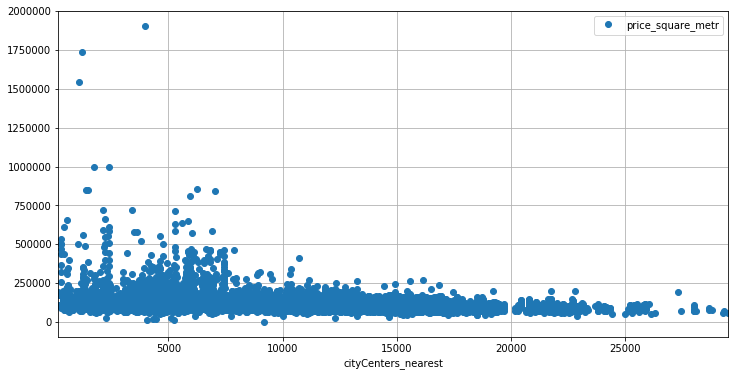

In [27]:
data.query('locality_name == "Санкт-Петербург"')\
.plot( x ='cityCenters_nearest', y = 'price_square_metr', style ='o',  grid = True, figsize = (12, 6) )


Хорошо видна граница на 7500, кажется именно там граница центра города, но далее, при построении линейного графика по километрам от центра, я уточню границу в 4 км. 

_____

Заполним пропуски в столбце floors_total. 

In [28]:
# Сколько всего пропусков
data['floors_total'].isnull().sum()

86

Взглянув на пропуски, можно заметить, что они сделаны там, где заполнен столбец с этажом, где располагается квартира. Возьмем данные для пропусков с этого столбца.

In [29]:
data.loc[data.loc[:,'floors_total'].isnull(),'floors_total'] = data.loc[data.loc[:,'floors_total'].isnull(),'floor']

In [30]:
data['floors_total'].isnull().sum()

0

____

#### Заполняем пропуски в высоте потолков

Я уже знаю, что граница центра примерно на 4000, посмотрим, как распределяется высота потолков. Правда, что в центре потолки будут выше?

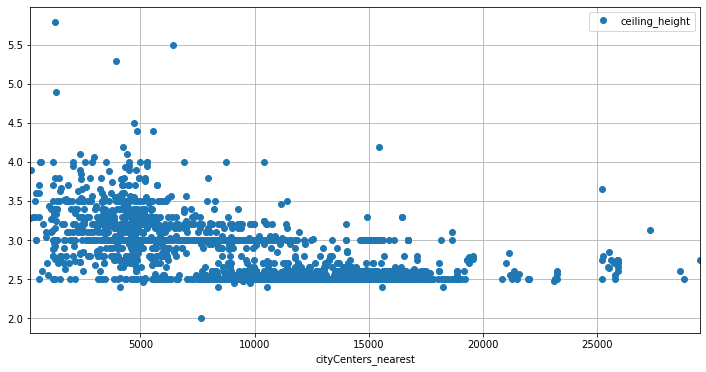

In [31]:
data.query('locality_name == "Санкт-Петербург" and floors_total == 5')\
.plot( x ='cityCenters_nearest', y = 'ceiling_height', style ='o',  grid = True, figsize = (12, 6) )

Действительно, можно заметить, как кучность высоты потолков снижается от центра к перифирии. Так как нет адресата, что бы можно было искать квартиры в одном доме, мы будем заполнять пропуски в высоте медианой от этажности дома, но разделим подсчет медиан на центр и периферию. Так же я отдельно рассмотрю Санкт-Петербург и другие города.

Сначала заполним пропуски по Санкт-Петербургу, далее по аналогии в других городах

In [32]:
data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].isna().sum()

5617

In [33]:
median_ceiling_height_center\
= data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 4000')\
.pivot_table(index = 'floors_total', values= 'ceiling_height', aggfunc = 'median')

In [34]:
median_ceiling_height_peref\
= data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest > 4000')\
.pivot_table(index = 'floors_total', values= 'ceiling_height', aggfunc = 'median')

In [35]:
for floors in median_ceiling_height_center.index:
    data.loc[(data['locality_name'] == "Санкт-Петербург") \
             & (data['cityCenters_nearest'] <= 4000) \
             & (data['floors_total'] == floors), 'ceiling_height']\
    = data.loc[(data['locality_name'] == "Санкт-Петербург") \
               & (data['cityCenters_nearest'] <= 4000) \
               & (data['floors_total'] == floors), 'ceiling_height']\
    .fillna(median_ceiling_height_center.loc[floors,'ceiling_height'])

In [36]:
for floors in median_ceiling_height_peref.index:
    data.loc[(data['locality_name'] == "Санкт-Петербург") \
             & (data['cityCenters_nearest'] > 4000) \
             & (data['floors_total'] == floors), 'ceiling_height']\
    = data.loc[(data['locality_name'] == "Санкт-Петербург") \
               & (data['cityCenters_nearest'] > 4000) \
               & (data['floors_total'] == floors), 'ceiling_height']\
    .fillna(median_ceiling_height_peref.loc[floors,'ceiling_height'])

In [37]:
data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].isna().sum()

34

In [38]:
# В большинстве из оставшихся не указано расстояние до центра, но есть и те, которые почему то не имеют медиан.
#data.query('locality_name == "Санкт-Петербург" and ceiling_height == "NaN"')

In [39]:
data.query('locality_name == "Санкт-Петербург" and ceiling_height == "NaN" and cityCenters_nearest != "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_metr
5988,3,19837000.0,83.60,2018-06-23T00:00:00,2,NaN,11.0,44.7,6,NaN,...,NaN,Санкт-Петербург,30917.0,3896.0,2.0,456.0,3.0,91.0,90.0,237284
7657,9,8001805.0,61.79,2018-04-05T00:00:00,2,NaN,11.0,29.9,2,NaN,...,NaN,Санкт-Петербург,31978.0,3578.0,0.0,NaN,0.0,NaN,13.0,129500
11575,9,9900000.0,101.00,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0,98019
14802,20,11500000.0,61.40,2018-03-06T00:00:00,2,NaN,11.0,NaN,2,NaN,...,NaN,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,90.0,187296


In [40]:
data[(data['locality_name'] == 'Санкт-Петербург') & (data['ceiling_height'].isna()) & (data['cityCenters_nearest'].isna()  == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_metr
5988,3,19837000.0,83.60,2018-06-23T00:00:00,2,NaN,11.0,44.7,6,NaN,...,NaN,Санкт-Петербург,30917.0,3896.0,2.0,456.0,3.0,91.0,90.0,237284
7657,9,8001805.0,61.79,2018-04-05T00:00:00,2,NaN,11.0,29.9,2,NaN,...,NaN,Санкт-Петербург,31978.0,3578.0,0.0,NaN,0.0,NaN,13.0,129500
11575,9,9900000.0,101.00,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0,98019
14802,20,11500000.0,61.40,2018-03-06T00:00:00,2,NaN,11.0,NaN,2,NaN,...,NaN,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,90.0,187296


In [41]:
data.query('locality_name == "Санкт-Петербург" and floors_total == 11')['ceiling_height'].median()

2.7649999999999997

In [42]:
data.query('locality_name == "Санкт-Петербург" and floors_total > 30')['ceiling_height'].median()

2.7

In [43]:
data.loc[(data.loc[:,'locality_name'] == 'Санкт-Петербург') & (data.loc[:,'floors_total'] == 11),'ceiling_height'] =\
data.loc[(data.loc[:,'locality_name'] == 'Санкт-Петербург') & (data.loc[:,'floors_total'] == 11),'ceiling_height'].fillna(2.75)

In [44]:
data.loc[(data.loc[:,'locality_name'] == 'Санкт-Петербург') & (data.loc[:,'floors_total'] == 33),'ceiling_height'] =\
data.loc[(data.loc[:,'locality_name'] == 'Санкт-Петербург') & (data.loc[:,'floors_total'] == 33),'ceiling_height'].fillna(2.7)

In [45]:
data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].isna().sum()

30

In [46]:
#data.query('locality_name == "Санкт-Петербург" and ceiling_height == "NaN"')

К сожалению, не возможно определить, как далеко от центра находятся эти квартиры, 
но удалять их не стоит, они имеют другие важные показатели. 
В среднем у них этажность большая, а как мы знаем, в центре Питера невысокие дома, но очень красивые.

In [47]:
for floors in median_ceiling_height_peref.index:
    data.loc[(data['locality_name'] == "Санкт-Петербург") \
             & (data['cityCenters_nearest'].isna()) \
             & (data['floors_total'] == floors), 'ceiling_height']\
    = data.loc[(data['locality_name'] == "Санкт-Петербург") \
               & (data['cityCenters_nearest'].isna()) \
               & (data['floors_total'] == floors), 'ceiling_height']\
    .fillna(median_ceiling_height_peref.loc[floors,'ceiling_height'])

In [48]:
data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].isna().sum()

0

Оставшиеся пропуски по высоте потолка заполним средним от этажности, не включая СПб.

In [49]:
data['ceiling_height'].isna().sum()

3573

In [50]:
median_ceiling_other_city\
= data.query('locality_name != "Санкт-Петербург"')\
.pivot_table(index = 'floors_total', values= 'ceiling_height', aggfunc = 'median')

In [51]:
for floors in median_ceiling_other_city.index:
    data.loc[data['floors_total'] == floors, 'ceiling_height']\
    = data.loc[data['floors_total'] == floors, 'ceiling_height']\
    .fillna(median_ceiling_other_city.loc[floors,'ceiling_height'])

In [52]:
data['ceiling_height'].isna().sum()

0

In [53]:
#data.info()


In [54]:
data.loc[:,['balcony','ponds_around3000', 'parks_around3000']] = \
data.loc[:,['balcony','ponds_around3000', 'parks_around3000']].fillna(0)

In [55]:
#data.isna().sum()

В колонке is_apartment пропущенные значения заменяем на False.

In [56]:
data.loc[:,'is_apartment'] = data.loc[:,'is_apartment'].fillna(False)

Разберемся с 49 неизвестными населенными пунктами.

In [57]:
#Почти у всех есть расстояние до центра!
#data.loc[data['locality_name'].isna()]

In [58]:
data.query('locality_name != "Санкт-Петербург"')\
.pivot_table(index = 'locality_name', values=('cityCenters_nearest', 'airports_nearest'),\
             aggfunc ={'cityCenters_nearest':['min','max'],'airports_nearest':['min','max'] })

airports_nearest          cityCenters_nearest         
                                     max      min                 max      min
locality_name                                                                 
Зеленогорск                      81607.0  70016.0             62706.0  51115.0
Колпино                          31691.0  23649.0             37477.0  29436.0
Красное Село                     38367.0  23892.0             41792.0  27317.0
Кронштадт                        69785.0  64931.0             51511.0  46657.0
Ломоносов                        56896.0  46502.0             61495.0  36816.0
Павловск                         24291.0  19380.0             36445.0  31533.0
Петергоф                         46535.0  34626.0             49574.0  29815.0
Пушкин                           21055.0  12157.0             35610.0  24311.0
Сестрорецк                       61872.0  50031.0             42971.0  31130.0
поселок Лисий Нос                55930.0  55930.0             28246.0  28246.0
поселок Мурино                   51553.0  51553.0             21888.0  21888.0
посёлок Александровская          13012.0  12781.0             27584.0  27352.0
посёлок Белоостров               57769.0  57769.0             38868.0  38868.0
посёлок Левашово                 52693.0  52693.0             25727.0  25727.0
посёлок Лисий Нос                55909.0  54068.0             28226.0  26368.0
посёлок Металлострой             26729.0  24629.0             29217.0  26696.0
посёлок Молодёжное               84869.0  83758.0             65968.0  64857.0
посёлок Парголово                61748.0  44346.0             24415.0  17994.0
посёлок Песочный                 56095.0  52504.0             27835.0  25867.0
посёлок Петро-Славянка           20605.0  20605.0             27165.0  27165.0
посёлок Понтонный                32141.0  28997.0             33853.0  30709.0
посёлок Репино                   64127.0  61451.0             45226.0  42550.0
посёлок Сапёрный                 34180.0  34110.0             35892.0  35822.0
посёлок Стрельна                 28945.0  26770.0             24134.0  21813.0
посёлок Усть-Ижора               26521.0  26500.0             28233.0  28212.0
посёлок Шушары                   26293.0   9294.0             32079.0  17012.0
посёлок Щеглово                  61908.0  61908.0             34085.0  34085.0

In [59]:
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] <= 17000),'locality_name'] =\
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] <= 17000),'locality_name'].fillna('Санкт-Петербург')

In [60]:
data[data['locality_name'].isna()]['cityCenters_nearest'].value_counts()

17369.0    8
41294.0    1
31813.0    1
23659.0    1
31897.0    1
Name: cityCenters_nearest, dtype: int64

In [61]:
data[data['locality_name'].isna()]['airports_nearest'].value_counts()

22041.0    8
60195.0    1
19659.0    1
20234.0    1
19744.0    1
Name: airports_nearest, dtype: int64

Проанализировав расстояние можем ориентироваться, примерно в каких населенных пунктах находятся наши неизвестные объявления. Заполним явные совпадения по расстоянию. 

In [62]:
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] == 17369)\
         | (data['cityCenters_nearest'] == 23659),'locality_name'] =\
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] == 17369)\
         | (data['cityCenters_nearest'] == 23659),'locality_name'].fillna('посёлок Шушары')

In [63]:
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] == 41294),'locality_name'] =\
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] == 41294),'locality_name'].fillna('Сестрорецк')

Осталось определить к какому поселку отнести оставшиеся, к Шушарам или Павловску. Я буду исходить из того, что Шушары застроена высотками, а повловск имеет невысотную застройку. floors_total = 4, определяем в Павловск.

In [64]:
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] == 31813)\
         | (data['cityCenters_nearest'] == 31897),'locality_name'] =\
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] == 31813)\
         | (data['cityCenters_nearest'] == 31897),'locality_name'].fillna('Павловск')

In [65]:
data.loc[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_metr
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.70,4.0,42.6,2,False,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,34.0,67475
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,2.70,4.0,25.8,3,False,...,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,92.0,67495
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,2.57,9.0,NaN,2,False,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,213.0,75000
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,2.50,5.0,47.3,2,False,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,24005
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.70,4.0,29.0,3,False,...,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,78.0,60357
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,2.57,9.0,30.5,2,False,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,176.0,75500
21898,2,5886750.0,83.5,2018-07-30T00:00:00,2,2.57,9.0,36.6,2,False,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,169.0,70500
22717,9,3000000.0,35.0,2018-01-02T00:00:00,1,2.60,16.0,16.0,7,False,...,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,75.0,85714


Осталось 8 объявлений, не имеющие своего места, мое решение их просто удалить.

In [66]:
data = data.dropna(subset = ['locality_name'])

In [67]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1902
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2276
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15612
ponds_around3000            0
ponds_nearest           14581
days_exposition          3180
price_square_metr           0
dtype: int64

Заполним пропуски в расстоянии до Центра и Аэропорта средними расстояниями в Зависимости от населенного пункта. 

In [68]:
mean_cityCenters_nearest_from_city = data.query('locality_name != "Санкт-Петербург"')\
.pivot_table(index = 'locality_name', values='cityCenters_nearest')

In [69]:
#mean_cityCenters_nearest_from_city

In [70]:
mean_airports_nearest_nearest_from_city = data.query('locality_name != "Санкт-Петербург"')\
.pivot_table(index = 'locality_name', values='airports_nearest')

In [71]:
for city in mean_cityCenters_nearest_from_city.index:
    data.loc[(data['locality_name'] == city) \
             & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest']\
    = data.loc[(data['locality_name'] == city) \
             & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest']\
    .fillna(mean_cityCenters_nearest_from_city.loc[city,'cityCenters_nearest'])

In [72]:
for city in mean_airports_nearest_nearest_from_city.index:
    data.loc[(data['locality_name'] == city) \
             & (data['airports_nearest'].isna()), 'airports_nearest']\
    = data.loc[(data['locality_name'] == city) \
             & (data['airports_nearest'].isna()), 'airports_nearest']\
    .fillna(mean_airports_nearest_nearest_from_city.loc[city,'airports_nearest'])

In [73]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1902
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2276
balcony                     0
locality_name               0
airports_nearest         5471
cityCenters_nearest      5447
parks_around3000            0
parks_nearest           15612
ponds_around3000            0
ponds_nearest           14581
days_exposition          3180
price_square_metr           0
dtype: int64

In [74]:
data.query('locality_name == "Санкт-Петербург"')[['airports_nearest','cityCenters_nearest']].isna().sum()

airports_nearest       85
cityCenters_nearest    61
dtype: int64

In [75]:
data.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].describe()

count    15688.000000
mean     11592.475969
std       4844.651330
min        181.000000
25%       8322.000000
50%      12241.000000
75%      14941.250000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

In [76]:
data.query('locality_name == "Санкт-Петербург"')['airports_nearest'].describe()

count    15664.000000
mean     28039.230784
std      11551.670826
min          0.000000
25%      18585.000000
50%      26736.500000
75%      36598.000000
max      54784.000000
Name: airports_nearest, dtype: float64

Всего объявлений по СПб более 15,5 тысячь, если я заполню пропуски медианой от расстояния, то не принесу большого вреда данным, из-за незначительности этих пропусков. А вот, если бы, все 5 тысячь были из СПб это могло бы привести к сильному искажению. 

In [77]:
data.loc[(data['locality_name']== 'Санкт-Петербург'),'cityCenters_nearest'] =\
data.loc[(data['locality_name']== 'Санкт-Петербург'),'cityCenters_nearest'].fillna(12241)

In [78]:
data.loc[(data['locality_name']== 'Санкт-Петербург'),'airports_nearest'] =\
data.loc[(data['locality_name']== 'Санкт-Петербург'),'airports_nearest'].fillna(26736.5)

In [79]:
data.query('locality_name == "Санкт-Петербург"')[['airports_nearest','cityCenters_nearest']].isna().sum()

airports_nearest       0
cityCenters_nearest    0
dtype: int64

In [80]:
data['days_exposition'] = data['days_exposition'].fillna(0)

Оставшиеся пропуски могут говорить о том, что эти населенные пункты находятся далеко от Санкт-Петербурга и далеко от ближайшего аэропорта. Пока оставим их пустыми. Так же, на данный момент, я оставлю незаполненными и другие пропуски. Так как большинство из них не будет иметь значения, для ответа на поставленные вопросы.

In [81]:
#data.info()

In [82]:
data[['last_price', 'floors_total', 'balcony','parks_around3000','ponds_around3000','days_exposition']]\
= data[['last_price', 'floors_total', 'balcony','parks_around3000','ponds_around3000','days_exposition']].astype('int')

In [83]:
data.duplicated().sum()

0

Закрадывается сомнения, что название поселений уникальны. Проверим. Для начала разобью на леммы и посчитаю их, отберу те, которых больше одного и проверю свою догадку

In [84]:
data_city_uni = data['locality_name'].unique()


In [85]:
data_city_uni = data_city_uni.tolist()

In [86]:
text = ','.join(data_city_uni)

In [87]:
lemmas =m.lemmatize(text)

In [88]:
from collections import Counter

In [89]:
print(Counter(lemmas))

Counter({' ': 484, ',': 363, 'поселок': 201, 'деревня': 106, 'городской': 53, 'тип': 39, '-': 12, 'село': 10, 'бор': 8, 'станция': 8, 'старый': 7, 'большой': 7, 'новый': 6, 'красный': 5, 'товарищество': 5, 'садовый': 4, 'малый': 4, 'муриный': 3, 'луг': 3, 'павлово': 3, 'ижора': 3, 'имя': 3, 'рябово': 3, 'поляна': 3, 'усть': 3, 'лесной': 3, 'коттеджный': 3, 'янино': 2, '1': 2, 'кудрово': 2, 'коммунар': 2, 'федоровский': 2, 'лебяжий': 2, 'кузьмоловский': 2, 'ропша': 2, 'аннино': 2, 'свет': 2, 'никольское': 2, 'сосновый': 2, 'романовка': 2, 'бугор': 2, 'рощино': 2, 'победа': 2, 'терволов': 2, 'советский': 2, 'петровский': 2, 'токсово': 2, 'вырица': 2, 'тельман': 2, 'лесогорский': 2, 'рахья': 2, 'колпана': 2, 'ладога': 2, 'зимитиц': 2, 'свердлов': 2, 'бегуница': 2, 'мга': 2, 'мичуринский': 2, 'ильичев': 2, 'вещево': 2, 'приладожский': 2, 'щегловый': 2, 'гаврилов': 2, 'рабитиц': 2, 'назия': 2, 'малукс': 2, 'саперный': 2, 'гарболовый': 2, 'приветнинский': 2, 'мельниково': 2, 'любань': 2, 'ст

In [90]:
#Вот и первое подтверждение буква ё и е
data[data['locality_name'].str.contains('янино', case = False)]['locality_name'].unique()

array(['городской посёлок Янино-1', 'городской поселок Янино-1'],
      dtype=object)

In [91]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [92]:
data.loc[:,'locality_name'] = data.loc[:,'locality_name']\
.replace(['городской','городского','станция','станции','поселок','типа','садовое','товарищество','село','деревня' ],' ',regex = True)

In [93]:
data['locality_name'] = data['locality_name'].str.strip()

In [94]:
#data['locality_name'].unique()

Выше я изменил букву "ё" на "е", а так же оставил только названия населенных пунктов. Эти действия привили к стандартизации названий, а так же мы убрали лишние дубликаты. 

In [95]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [96]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format = '%Y-%m-%dT%H:%M:%S')

### Вывод
Была проведена работа по предобработке данных. Для начала были исправлены нериалистичные значения в высоте потолка, далее были проведены манипуляции с данными, для заполнения пропусков. В конце, для того что бы исключить дубликаты, была проведена лемматизация столбца locality_name, что бы привести его к единому виду и убрать имеющиеся дубликаты, а так же это в дальнейшем даст более точную статистику. Я узнал, где Санкт-Петербург переходит в центр (Старый город), там цены на квартиры резко повышаются и перевел дату в необходимый формат.

#### Изучим время продажи квартиры

In [97]:
#data.info()

In [98]:
data['days_exposition'].describe()

count    23690.000000
mean       156.632208
std        213.579605
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [99]:
data.query('locality_name == "Санкт-Петербург"')['days_exposition'].describe()

count    15749.000000
mean       158.811163
std        218.317315
min          0.000000
25%         21.000000
50%         74.000000
75%        200.000000
max       1572.000000
Name: days_exposition, dtype: float64

In [100]:
low_90 =0.9
low_50 = 0.5
low_1 = 0.1



In [101]:
data['days_exposition'].quantile(q=[low_90,low_50,low_1])

0.9    426.0
0.5     74.0
0.1      0.0
Name: days_exposition, dtype: float64

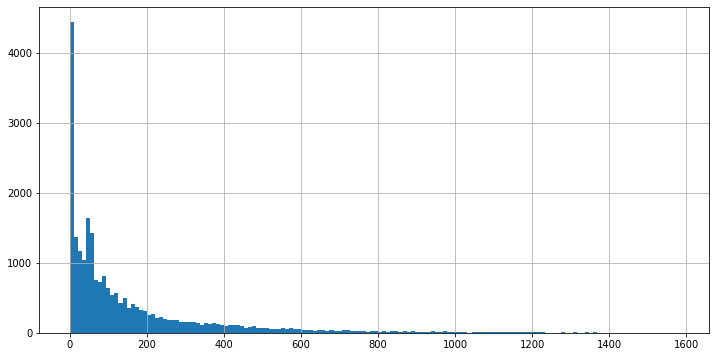

In [102]:
data['days_exposition'].hist(bins=150, figsize = (12,6))

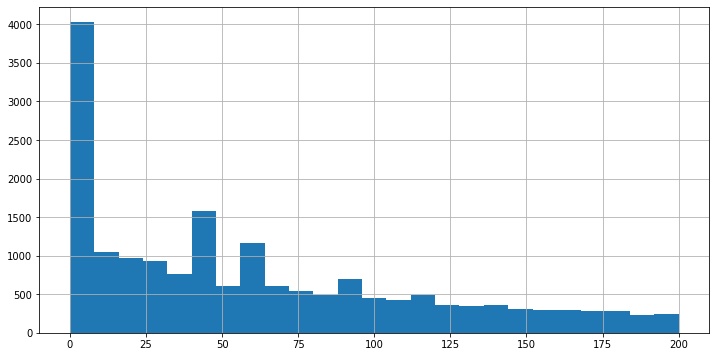

In [103]:
data['days_exposition'].hist(bins=25, figsize = (12,6),range = (0, 200))

Можем заметить, что большинство 75% квартир продается до 200 дней. Внутри этих 200 дней можем заметить всплески примерно в 0 и 45 дней. Вопрос, когда можно считать, что продажи прошли очень быстро, а когда необычно долго?. Я считаю, что если ваша квартира продалась менее чем за 2,5 месяца, то вы продали достаточно быстро, а вот если вы продаете уже более 200 дней, вы начинаете попадать в категорию долго продающихся. Можем заметить, что 90 % квартир проданы менее чем 426 дней. Те, кто продает дольше, входят в 10% долго продающих. Ну и , если вы продали менее чем за сутки, то вы продали очень быстро и попали в 10% тех, кто продал так же быстро. 

_____

##### Зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.

Я буду рассматривать город Санкт-Петербург отдельно, причем буду делить его на центр и периферию.
Рассмотрим ниже, как цена будет коррелировать от площади, количества комнат и удаленности от центра.

In [104]:
data['km_cityCenters_nearest'] = (data['cityCenters_nearest'] / 1000).round(0)

In [105]:
data_kmcityCenters_nearest_pivot\
= data.query('locality_name == "Санкт-Петербург"')\
.pivot_table(index ='km_cityCenters_nearest', values = 'last_price', aggfunc=('mean','median')).reset_index()

In [106]:
data_km_other_cityCenters_nearest_pivot \
= data.query('locality_name != "Санкт-Петербург"')\
.pivot_table(index ='km_cityCenters_nearest', values = 'last_price', aggfunc=('mean','median')).reset_index()

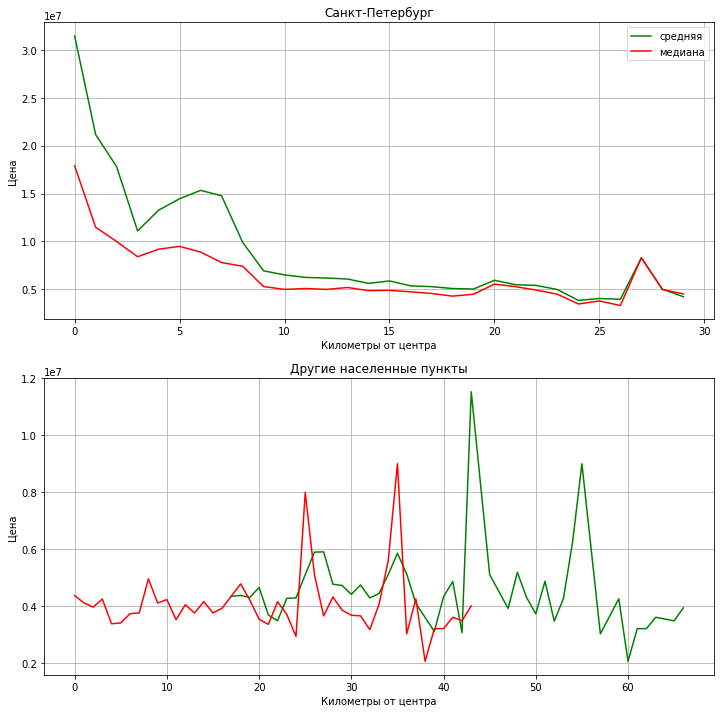

In [107]:
#Цены в зависимости удаления от центра в СПб
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.title('Санкт-Петербург')
plt.xlabel('Километры от центра')
plt.ylabel('Цена')
plt.plot(data_kmcityCenters_nearest_pivot['km_cityCenters_nearest'], data_kmcityCenters_nearest_pivot['mean'], color = 'green', label='средняя')
plt.plot(data_kmcityCenters_nearest_pivot['median'], color = 'red', label='медиана')
plt.grid(True)
plt.legend()
#Цены в зависимости удаления от центра в других городах
plt.subplot(2, 1, 2)
plt.title('Другие населенные пункты')
plt.xlabel('Километры от центра')
plt.ylabel('Цена')
plt.plot(data_km_other_cityCenters_nearest_pivot['km_cityCenters_nearest'], data_km_other_cityCenters_nearest_pivot['mean'], color = 'green', label='средняя')
plt.plot(data_km_other_cityCenters_nearest_pivot['median'], color = 'red', label='медиана')
plt.grid(True)

In [108]:
data.query('locality_name != "Санкт-Петербург" and last_price > 6000000')['locality_name'].unique()

array(['Парголово', 'Петергоф', 'Павловск', 'Пушкин', 'Сестрорецк',
       'Ломоносов', 'Сосновый Бор', 'Красное Село', 'Зеленогорск',
       'Мурино', 'Колпино', 'Александровская', 'Кудрово', 'Кронштадт',
       'Бугры', 'Шушары', 'Гатчина', 'Всеволожск', 'Стрельна', 'Репино',
       'Выборг', 'Тосно', 'Сертолово', 'Хязельки', 'Рощино',
       'Новое Девяткино', 'Янино-1', 'Луга', 'Мистолово', 'Сосново',
       'Тельмана', 'Кальтино', 'Юкки', 'Бор', 'Гостилицы', 'Куттузи',
       'Заневка', 'Металлострой', 'Токсово', 'Лисий Нос'], dtype=object)

In [109]:
data.query('locality_name != "Санкт-Петербург" and last_price > 11000000')['locality_name'].unique()

array(['Петергоф', 'Пушкин', 'Александровская', 'Сестрорецк',
       'Красное Село', 'Репино', 'Выборг', 'Сертолово', 'Гатчина',
       'Кронштадт', 'Новое Девяткино', 'Стрельна', 'Колпино', 'Павловск',
       'Бор', 'Кудрово', 'Зеленогорск', 'Всеволожск'], dtype=object)

Взяв среднюю и медиану от цены по километрам, можем четко пронаблюдать, как в городе Санкт-Петербурке уменьшается цена от центра к периферии. Интересно заметить, как цена резко падает до отметки в 4 км, будем считать, что это граница центра Санкт-Петербурга. В других населенных пунктах наблюдаются всплески цен, где располагаются большие города-спутники Санкт-Петербурга, а так же это район тоже исторически ценен, что повышает стоимость квартир. 

In [110]:
spb_centr_data_corr = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 4000')[['last_price','total_area','rooms','cityCenters_nearest']]

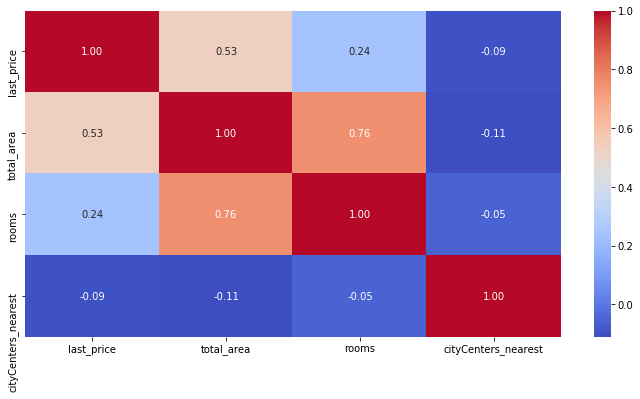

In [111]:
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(spb_centr_data_corr.corr(), annot=True, fmt='.2f', ax=ax, cmap=sns.color_palette('coolwarm', 128))

In [112]:
spb_perf_data_corr = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest > 4000')[['last_price','total_area','rooms','cityCenters_nearest']]

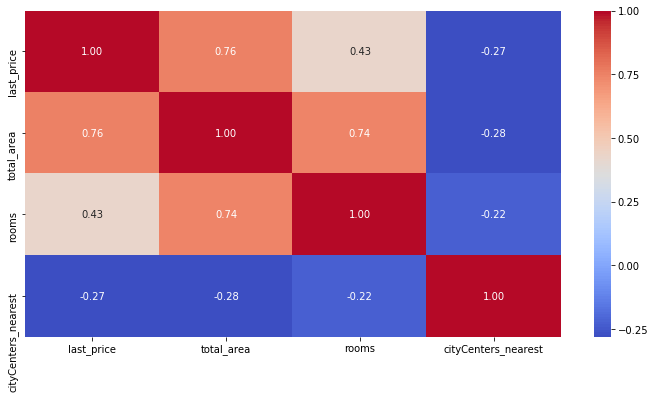

In [113]:
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(spb_perf_data_corr.corr(), annot=True, fmt='.2f', ax=ax, cmap=sns.color_palette('coolwarm', 128))

In [114]:
spb_other_data_corr = data.query('locality_name != "Санкт-Петербург"')[['last_price','total_area','rooms','cityCenters_nearest']]

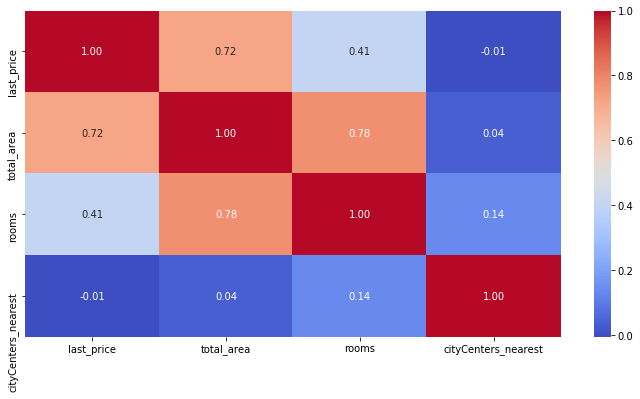

In [115]:
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(spb_other_data_corr.corr(), annot=True, fmt='.2f', ax=ax, cmap=sns.color_palette('coolwarm', 128))

 - Зависимость цены от количества квадратных метров есть, но она более ярко представлена в регионе и, если брать город Санкт-Петербург, то чем дальше от центра, тем больше эта зависимость. Это можно объяснить тем, что центр Санкт-Петербурга, сам по себе дорогой и цена за квадратный метр выше.
 - Зависимость цены от количества комнат меньше, и она сильнее проявляется в регионах. Вообще, чем больше комнат,тем больше площадь.
 - А вот зависимость цены от расстояния уже имеет отрицательную корреляцию, ну, оно и понятно чем ближе к центру - тем дороже. Более ярко это видно не в центральной части Санкт-Петербурга. 
 
 Необходимо посмотреть детальней на эти данные

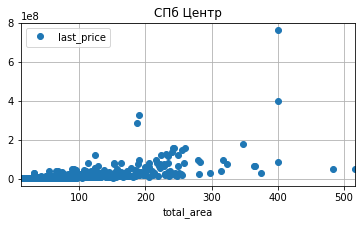

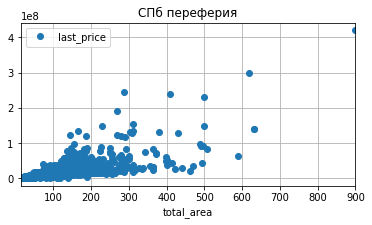

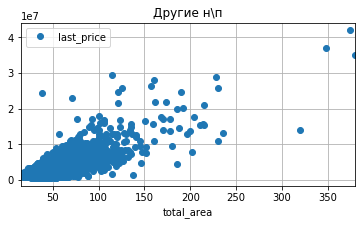

In [116]:
spb_centr_data_corr.plot( x ='total_area', y = 'last_price', style ='o',  grid = True, figsize = (6, 3), title = 'СПб Центр')
spb_perf_data_corr.plot( x ='total_area', y = 'last_price', style ='o',  grid = True,  figsize = (6, 3), title = 'СПб переферия' )
spb_other_data_corr.plot( x ='total_area', y = 'last_price', style ='o', grid = True, figsize = (6, 3), title = 'Другие н\п' )

Мы видим, что с увеличением площади цены растут. Особенно это хорошо заметно в других населенных пунктах, где цена растет больше и резче.

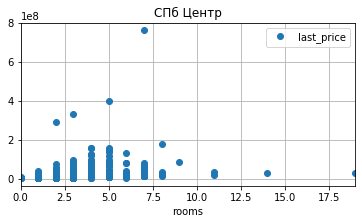

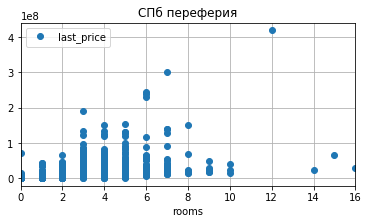

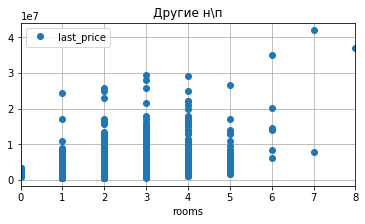

In [117]:
spb_centr_data_corr.plot( x ='rooms', y = 'last_price', style ='o',  grid = True, figsize = (6, 3), title = 'СПб Центр')
spb_perf_data_corr.plot( x ='rooms', y = 'last_price', style ='o',  grid = True,  figsize = (6, 3), title = 'СПб переферия' )
spb_other_data_corr.plot( x ='rooms', y = 'last_price', style ='o', grid = True, figsize = (6, 3), title = 'Другие н\п' )

Вот из-за чего корреляция не близка к 1, можем заметить, что цена растет до определенного количества комнат, к примеру, по Санкт-Петербургу это до 5 комнат и других городах 4 комнаты, а далее цена, в целом, начинает снижаться, не считая некоторых выбросов. 

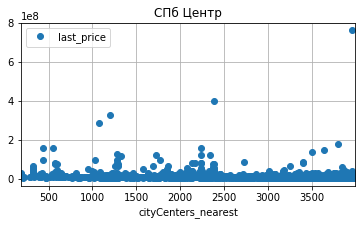

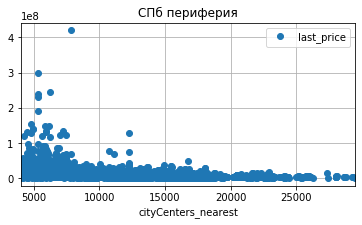

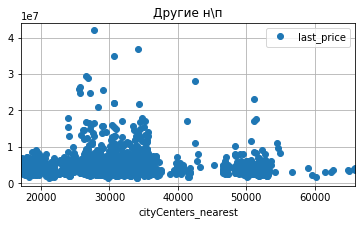

In [118]:
spb_centr_data_corr.plot( x ='cityCenters_nearest', y = 'last_price', style ='o',  grid = True, figsize = (6, 3), title = 'СПб Центр')
spb_perf_data_corr.plot( x ='cityCenters_nearest', y = 'last_price', style ='o',  grid = True,  figsize = (6, 3), title = 'СПб периферия' )
spb_other_data_corr.plot( x ='cityCenters_nearest', y = 'last_price', style ='o', grid = True, figsize = (6, 3), title = 'Другие н\п' )

На этих графиках мы можем заметить кучность цены, в общем до 7,5 км от центра цена идет более-менее ровно, далее падает. Что касается других населенных пунктов, то, чем они ближе к Санкт-Петербургу, тем выше цена квартир. 

##### Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

Для начала рассмотрим зависимость цены от этажа дома. Я полагаю, что чем выше этаж, тем цена больше. Здесь я так же использую три группы ( Центр СПб, переферия СПб и другие населенные пункты).

In [119]:
data_centr_spb = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 4000')

In [120]:
data_peref_spb = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest > 4000')

In [121]:
data_other_city = data.query('locality_name != "Санкт-Петербург"')

________

In [122]:
data_centr_spb_floors_pivot = data_centr_spb.\
pivot_table(index = 'floor', values = 'last_price', aggfunc = ('median', 'mean')).reset_index()

In [123]:
data_peref_spb_floors_pivot = data_peref_spb.\
pivot_table(index = 'floor', values = 'last_price', aggfunc = ('median', 'mean')).reset_index()

In [124]:
data_other_city_floors_pivot = data_other_city.\
pivot_table(index = 'floor', values = 'last_price', aggfunc = ('median', 'mean')).reset_index()

In [125]:
data_centr_spb_floors_pivot.columns = ['floors', 'mean', 'median']
data_peref_spb_floors_pivot.columns = ['floors', 'mean', 'median']
data_other_city_floors_pivot.columns = ['floors', 'mean', 'median']

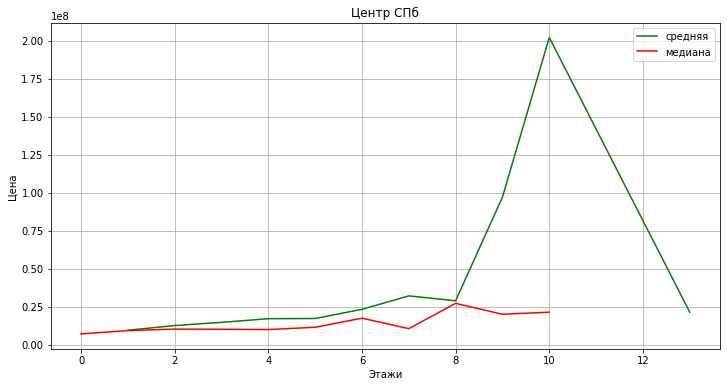

In [126]:
plt.figure(figsize=(12, 6))
plt.title('Центр СПб')
plt.xlabel('Этажи')
plt.ylabel('Цена')
plt.plot(data_centr_spb_floors_pivot['floors'], data_centr_spb_floors_pivot['mean'], color = 'green', label='средняя')
plt.plot(data_centr_spb_floors_pivot['median'], color = 'red', label='медиана')
plt.grid(True)
plt.legend()

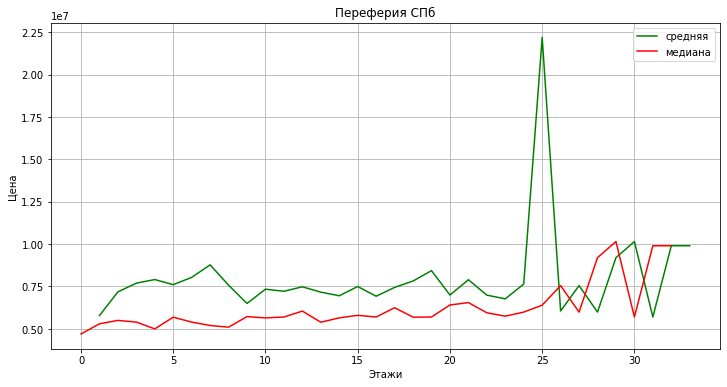

In [127]:
plt.figure(figsize=(12, 6))
plt.title('Переферия СПб')
plt.xlabel('Этажи')
plt.ylabel('Цена')
plt.plot(data_peref_spb_floors_pivot['floors'], data_peref_spb_floors_pivot['mean'], color = 'green', label='средняя')
plt.plot(data_peref_spb_floors_pivot['median'], color = 'red', label='медиана')
plt.grid(True)
plt.legend()

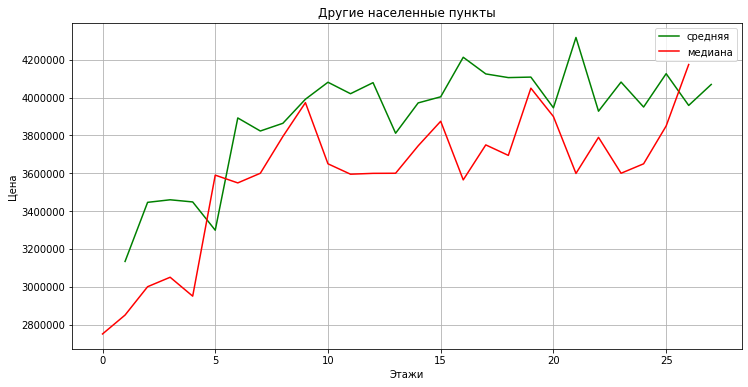

In [128]:
plt.figure(figsize=(12, 6))
plt.title('Другие населенные пункты')
plt.xlabel('Этажи')
plt.ylabel('Цена')
plt.plot(data_other_city_floors_pivot['floors'], data_other_city_floors_pivot['mean'], color = 'green', label='средняя')
plt.plot(data_other_city_floors_pivot['median'], color = 'red', label='медиана')
plt.grid(True)
plt.legend()

Наблюдается зависимость цены от высоты этажа, чем выше этаж, тем больше цена. Особенно это заметно в регионе. Можно сказать, что самый дешевый этаж это первый. 

_____

In [129]:
def name_floor (data):
    floor = data['floor']
    total_floor = data['floors_total']
    if floor == 1 or floor == 0:
        return 'первый'
    if floor == total_floor:
        return 'последний'
    return 'другой'

In [130]:
data['cat_floor'] = data.apply(name_floor, axis =1)

In [131]:
data_price_for_floor_spb_center = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 4000')\
.pivot_table(index = 'cat_floor', values = 'last_price').reset_index()

In [132]:
data_price_for_floor_spb_center.columns = ['num_floor','center_spb']

In [133]:
data_price_for_floor_spb = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest>4000')\
.pivot_table(index = 'cat_floor', values = 'last_price').reset_index()

In [134]:
data_price_for_floor_spb.columns = ['num_floor','not_center_spb']

In [135]:
data_price_for_floor_other = data.query('locality_name != "Санкт-Петербург"')\
.pivot_table(index = 'cat_floor', values = 'last_price').reset_index()

In [136]:
data_price_for_floor_other.columns = ['num_floor','other_city']

In [137]:
price_for_floor = data_price_for_floor_spb_center\
.merge(data_price_for_floor_spb, on = 'num_floor', how='left')

In [138]:
price_for_floor = price_for_floor.merge(data_price_for_floor_other, on = 'num_floor', how='left')

In [139]:
price_for_floor

,num_floor,center_spb,not_center_spb,other_city
0,другой,1.634171e+07,7.422533e+06,3.668564e+06
1,первый,9.556472e+06,5.784211e+06,3.133540e+06
2,последний,1.901457e+07,8.848028e+06,3.377411e+06


Видно, что по Санкт-Петербургу ценятся больше всего последние этажи. Тогда как в других населенных пунктах первое место занимают квартиры на любом другом этаже кроме первого и последнего. А вот первые этажи ценятся меньше всего везде, но в других населенных пунктах нет такого большого разрыва. 

##### Поиск зависимости от даты размещения: дня недели, месяца и года.

Зависит ли цена, а так же скорость продажи, от того, когда была выставленна квартира на продажу.

In [140]:
data['year'] = data['first_day_exposition'].dt.year

In [141]:
data['month'] = data['first_day_exposition'].dt.month

In [142]:
data['day'] = data['first_day_exposition'].dt.day

In [143]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [144]:
#Возвращает pivot таблицу для СПб по датам
def pivot_date_spb (date_column):
    return_pivot = data.query('locality_name == "Санкт-Петербург"')\
.pivot_table(index = date_column, values =('last_price','days_exposition'), aggfunc = 'median').reset_index()
    return return_pivot

In [145]:
#Возвращает pivot таблицу для других н\п по датам
def pivot_date_other_city (date_column):
    return_pivot = data.query('locality_name != "Санкт-Петербург"')\
.pivot_table(index = date_column, values =('last_price','days_exposition'), aggfunc = 'median').reset_index()
    return return_pivot

____

In [146]:
data_year_pivot_spb = pivot_date_spb('year')

In [147]:
data_year_pivot_other = pivot_date_other_city('year')

_____

In [148]:
data_month_pivot_spb = pivot_date_spb('month')

In [149]:
data_month_pivot_other =pivot_date_other_city('month')

_____

In [150]:
data_day_pivot_spb = pivot_date_spb('day')

In [151]:
data_day_pivot_other =pivot_date_other_city('day')

_____

In [152]:
data_wday_pivot_spb = pivot_date_spb('weekday')

In [153]:
data_wday_pivot_other =pivot_date_other_city('weekday')

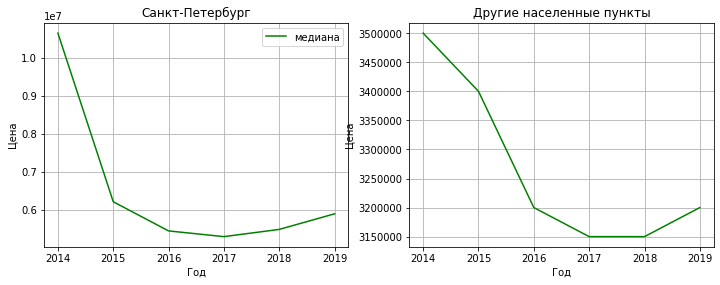

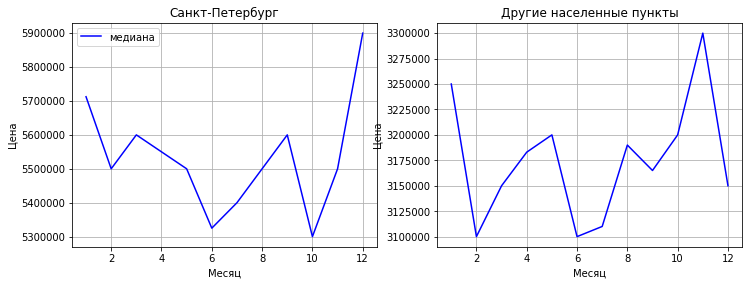

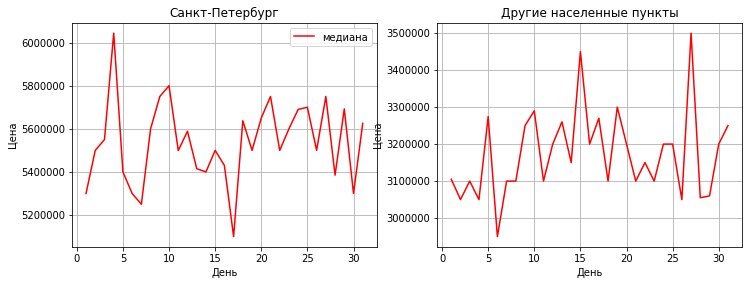

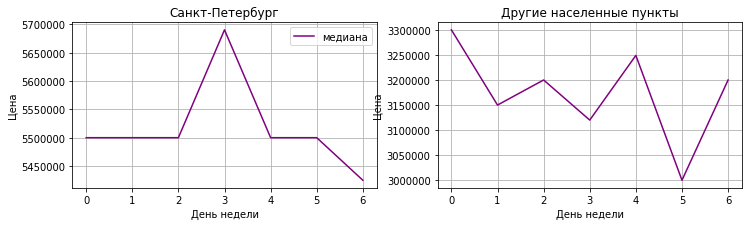

In [154]:
#Цены в зависимости от года в СПБ
plt.figure(figsize=(12, 14))
plt.subplot(3, 2, 1)
plt.title('Санкт-Петербург')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.plot(data_year_pivot_spb['year']\
         , data_year_pivot_spb['last_price'], color = 'green', label='медиана')
plt.grid(True)
plt.legend()
#Цены в зависимости от года в других городах
plt.subplot(3, 2, 2)
plt.title('Другие населенные пункты')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.plot(data_year_pivot_other['year']\
         , data_year_pivot_other['last_price'], color = 'green', label='медиана')
plt.grid(True)

#Цены в зависимости от месяца в СПБ
plt.figure(figsize=(12, 14))
plt.subplot(3, 2, 3)
plt.title('Санкт-Петербург')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.plot(data_month_pivot_spb['month']\
         , data_month_pivot_spb['last_price'], color = 'b', label='медиана')
plt.grid(True)
plt.legend()
#Цены в зависимости от месяца в других городах
plt.subplot(3, 2, 4)
plt.title('Другие населенные пункты')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.plot(data_month_pivot_other['month']\
         , data_month_pivot_other['last_price'], color = 'b', label='медиана')
plt.grid(True)

#Цены в зависимости от дня в СПБ
plt.figure(figsize=(12, 14))
plt.subplot(3, 2, 5)
plt.title('Санкт-Петербург')
plt.xlabel('День')
plt.ylabel('Цена')
plt.plot(data_day_pivot_spb['day']\
         , data_day_pivot_spb['last_price'], color = 'r', label='медиана')
plt.grid(True)
plt.legend()
#Цены в зависимости от дня в других городах
plt.subplot(3, 2, 6)
plt.title('Другие населенные пункты')
plt.xlabel('День')
plt.ylabel('Цена')
plt.plot(data_day_pivot_other['day']\
         , data_day_pivot_other['last_price'], color = 'r', label='медиана')
plt.grid(True)



#Цены в зависимости от дня недели в СПБ
plt.figure(figsize=(12, 14))
plt.subplot(4, 2, 7)
plt.title('Санкт-Петербург')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.plot(data_wday_pivot_spb['weekday']\
         , data_wday_pivot_spb['last_price'], color = 'purple', label='медиана')
plt.grid(True)
plt.legend()
#Цены в зависимости от дня недели в других городах
plt.subplot(4, 2, 8)
plt.title('Другие населенные пункты')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.plot(data_wday_pivot_other['weekday']\
         , data_wday_pivot_other['last_price'], color = 'purple', label='медиана')
plt.grid(True)

Можно заметить, как цена падала до 2017 года, а с 2017 наблюдается небольшой рост цены. Цена достигает своих минимальных значений в летнее время, в особенности выделяется июль, а вот поздняя осень, начало зимы, здесь пиковые, высокие, значения цены. Не стоит покупать в это время. Что же касается дня, то по Санкт-Петербургу середина месяца квартиры стоят меньше, а вот в других населенных наоборот дороже, удивительно, но до 4 дня в СПб и 5 в других н\п начинается резкий рост, а уже к 6 дню какое-то магическое минимальное значение. Что касается дня недели, то по Санкт-Петербургу в четверг продаются самые дорогие квартиры, а вот к воскресенью цены падают. В других н\п суббота является самым дешовым днем недели, а в будни в среднем дороже,где понедельник самый дорогой. 

Можно сделать небольшой вывод, если хочешь купить квартиру, то смотри на объявления выложенные летом 6 - 7 числа, лучше, что бы это были выходные, и поторопись, цена в общем начинает расти :)

#### Влияет ли время, когда была выставленна квартира, на ее скорость продажи.

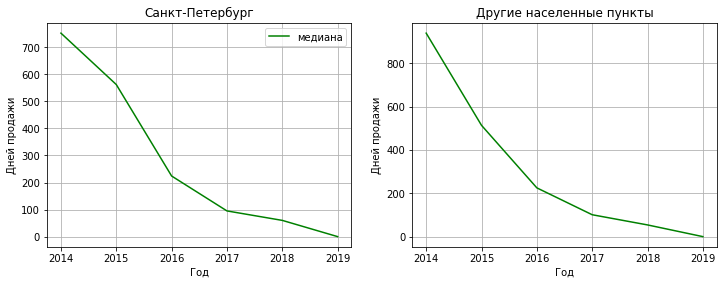

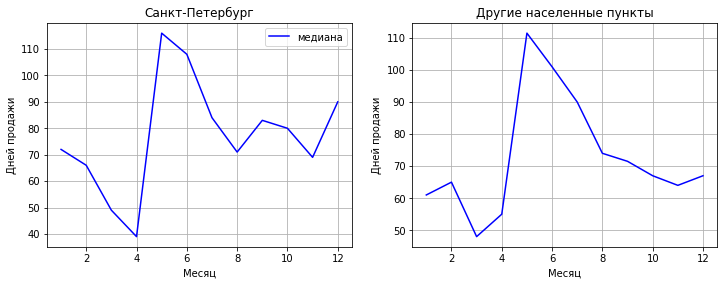

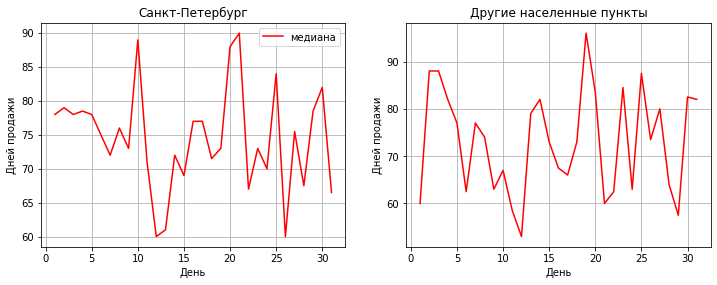

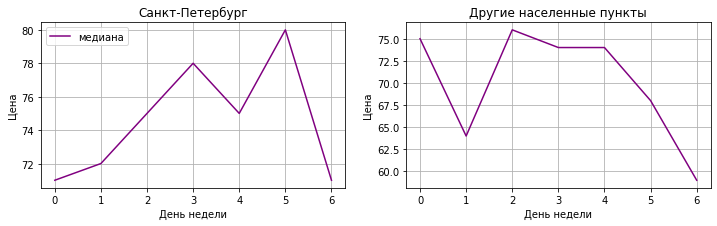

In [155]:
#Скорость продажи квартиры в зависимости от года в СПБ
plt.figure(figsize=(12, 14))
plt.subplot(3, 2, 1)
plt.title('Санкт-Петербург')
plt.xlabel('Год')
plt.ylabel('Дней продажи')
plt.plot(data_year_pivot_spb['year']\
         , data_year_pivot_spb['days_exposition'], color = 'green', label='медиана')
plt.grid(True)
plt.legend()
#Скорость продажи квартиры в зависимости от года в других городах
plt.subplot(3, 2, 2)
plt.title('Другие населенные пункты')
plt.xlabel('Год')
plt.ylabel('Дней продажи')
plt.plot(data_year_pivot_other['year']\
         , data_year_pivot_other['days_exposition'], color = 'green', label='медиана')
plt.grid(True)

#Скорость продажи квартиры в зависимости от месяца в СПБ
plt.figure(figsize=(12, 14))
plt.subplot(3, 2, 3)
plt.title('Санкт-Петербург')
plt.xlabel('Месяц')
plt.ylabel('Дней продажи')
plt.plot(data_month_pivot_spb['month']\
         , data_month_pivot_spb['days_exposition'], color = 'b', label='медиана')
plt.grid(True)
plt.legend()
#Скорость продажи квартиры в зависимости от месяца в других городах
plt.subplot(3, 2, 4)
plt.title('Другие населенные пункты')
plt.xlabel('Месяц')
plt.ylabel('Дней продажи')
plt.plot(data_month_pivot_other['month']\
         , data_month_pivot_other['days_exposition'], color = 'b', label='медиана')
plt.grid(True)

#Скорость продажи квартиры в зависимости от дня в СПБ
plt.figure(figsize=(12, 14))
plt.subplot(3, 2, 5)
plt.title('Санкт-Петербург')
plt.xlabel('День')
plt.ylabel('Дней продажи')
plt.plot(data_day_pivot_spb['day']\
         , data_day_pivot_spb['days_exposition'], color = 'r', label='медиана')
plt.grid(True)
plt.legend()
#Скорость продажи квартиры в зависимости от дня в других городах
plt.subplot(3, 2, 6)
plt.title('Другие населенные пункты')
plt.xlabel('День')
plt.ylabel('Дней продажи')
plt.plot(data_day_pivot_other['day']\
         , data_day_pivot_other['days_exposition'], color = 'r', label='медиана')
plt.grid(True)

#Скорость продажи квартиры в зависимости от дня недели в СПБ
plt.figure(figsize=(12, 14))
plt.subplot(4, 2, 7)
plt.title('Санкт-Петербург')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.plot(data_wday_pivot_spb['weekday']\
         , data_wday_pivot_spb['days_exposition'], color = 'purple', label='медиана')
plt.grid(True)
plt.legend()
#Скорость продажи квартиры в зависимости от дня недели в других городах
plt.subplot(4, 2, 8)
plt.title('Другие населенные пункты')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.plot(data_wday_pivot_other['weekday']\
         , data_wday_pivot_other['days_exposition'], color = 'purple', label='медиана')
plt.grid(True)

Хорошо видно,что в общем скорость продажи квартир увеличилась, точнее уменьшилось время продажи квартиры в целом. Мы можем заметить это на первых графиках. А вот если вы начинаете продавать свою квартиру в конце весны - начала лета, то рискуете подзадержаться в ее продаже. Лучше начинать продавать осенью. А вот если взглянуть на 3 пару графиков, то увидим интересный минимум на 11 - 12 дне месяца, этот минимум нам говорит, что те, кто выложил свою квартиру на продажу в этих датах, быстрее ее продали. Ну и на счет дня недели, видно, что квартиры выложенные на продажу в воскресенье быстрее продаются, так-же в СПб "быстрым" днем недели можно назвать понедельник.

#### Посчитать среднюю цену квадратного метра в десяти населённых пунктах, где число объявлений больше всего. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.

Найдем средние цены за квадратный метр по Санкт-Петербургу, что бы можно было сранить их с другими населенными пунктами.

In [156]:
#Средняя цена за квадратный метр по центру СПб
data_centr_spb['price_square_metr'].mean()

145905.6128755365

In [157]:
#Средняя цена за квадратный метр без учета центра в СПб
data_peref_spb['price_square_metr'].mean()

112322.30869445969

In [158]:
#Топ из 10 населенных пунктов от колличества объявлений и их средняя цена за квадратный метр. 
top_city_price_square_metr_from_count_ad = data.query('locality_name != "Санкт-Петербург"')\
.pivot_table(index = 'locality_name', values = ('price_square_metr', 'km_cityCenters_nearest')\
             , aggfunc= {'price_square_metr':['count', 'mean'],'km_cityCenters_nearest':'mean'}).sort_values(by=('price_square_metr','count'), ascending =False).head(10)

In [159]:
top_city_price_square_metr_from_count_ad

km_cityCenters_nearest price_square_metr               
                                mean             count           mean
locality_name                                                        
Мурино                     22.000000             590.0   86087.055932
Кудрово                          NaN             472.0   95324.476695
Шушары                     24.073497             449.0   78696.167038
Всеволожск                       NaN             398.0   68654.007538
Пушкин                     28.766938             369.0  103125.373984
Колпино                    32.038462             338.0   75424.150888
Парголово                  19.948012             327.0   90175.489297
Гатчина                          NaN             307.0   68745.693811
Выборг                           NaN             237.0   58141.489451
Петергоф                   35.452736             201.0   84757.104478

Больше всего объявлений в городах-спутниках, эти районы плотно застроены и все еще строятся, поэтому здесь так много объявлений.

In [160]:
#Топ из 10 населенных пунктов, где цена за квадратный метр выше остальных.
top_city_price_square_metr = data.query('locality_name != "Санкт-Петербург"')\
.pivot_table(index = 'locality_name', values = 'price_square_metr').reset_index()\
.sort_values(by='price_square_metr', ascending =False).head(10)

#Топ из 10 населенных пунктов, где цена за квадратный метр меньше остальных.
low_city_price_square_metr = data.query('locality_name != "Санкт-Петербург"')\
.pivot_table(index = 'locality_name', values = 'price_square_metr').reset_index()\
.sort_values(by='price_square_metr', ascending =False).tail(10)

In [161]:
top_city_price_square_metr

,locality_name,price_square_metr
64,Зеленогорск,115122.500000
210,Репино,104238.500000
199,Пушкин,103125.373984
232,Сестрорецк,101726.032609
120,Лисий Нос,100660.333333
139,Мистолово,98549.545455
115,Левашово,96997.000000
104,Кудрово,95324.476695
167,Парголово,90175.489297
251,Стрельна,88691.477273


Цены не дотягивают до цен Санкт-Петербурга, но подходят очень близко, так же эти города пересекаются со списком, где больше всего объявлений. 

In [162]:
low_city_price_square_metr

,locality_name,price_square_metr
59,Житково,14956.0
297,Ям-Тесово,13711.0
234,Сижно,13709.0
263,Тесово-4,12931.0
129,Малая Романовка,12724.0
239,Совхозный,12628.5
37,Выскатка,12335.0
24,Вахнова Кара,11688.0
223,Свирь,11481.0
247,Старополье,11206.0


Населенные пункты с наименьшей ценой за квадратный метр. Их цена более чем в 10 раз меньше цены по Санкт-Петербургу. 

##### Сегмент квартир в центре, изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [163]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_square_metr',
       'km_cityCenters_nearest', 'cat_floor', 'year', 'month', 'day',
       'weekday'],
      dtype='object')

In [164]:
centr_spb = data_centr_spb[['last_price', 'ceiling_height' , 'rooms', 'total_area']]

In [165]:
centr_spb.describe()

,last_price,ceiling_height,rooms,total_area
count,1.165000e+03,1165.000000,1165.000000,1165.000000
mean,1.600476e+07,3.176652,3.103863,97.371365
std,3.284043e+07,0.316692,1.556064,55.659083
min,2.100000e+06,2.450000,0.000000,12.000000
25%,7.000000e+06,3.000000,2.000000,62.000000
50%,9.500000e+06,3.150000,3.000000,84.100000
75%,1.449000e+07,3.280000,4.000000,115.200000
max,7.630000e+08,5.800000,19.000000,517.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f020be30c50>,
      dtype=object)

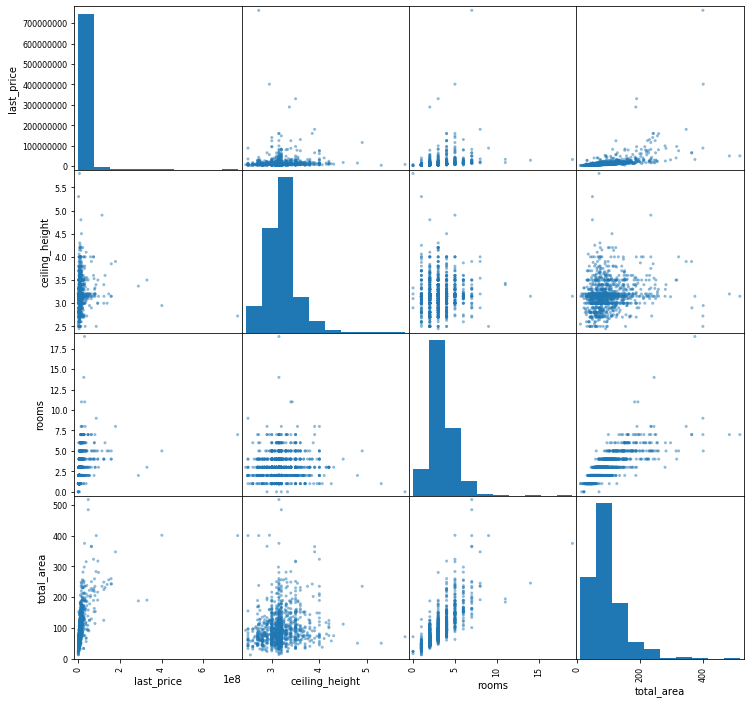

In [166]:
pd.plotting.scatter_matrix(centr_spb, figsize=(12, 12))

In [167]:
centr_spb_date_year = data.query('cityCenters_nearest <= 4000 and locality_name == "Санкт-Петербург"')\
.pivot_table(index ='year', values = 'last_price', aggfunc = 'mean' ).reset_index()

centr_spb_date_month = data.query('cityCenters_nearest <= 4000 and locality_name == "Санкт-Петербург"')\
.pivot_table(index ='month', values = 'last_price', aggfunc = ('mean', 'median')).reset_index()

centr_spb_date_day = data.query('cityCenters_nearest <= 4000 and locality_name == "Санкт-Петербург"')\
.pivot_table(index ='day', values = 'last_price', aggfunc = ('mean', 'median')).reset_index()

centr_spb_date_weekday = data.query('cityCenters_nearest <= 4000 and locality_name == "Санкт-Петербург"')\
.pivot_table(index ='weekday', values = 'last_price', aggfunc = ('mean', 'median')).reset_index()

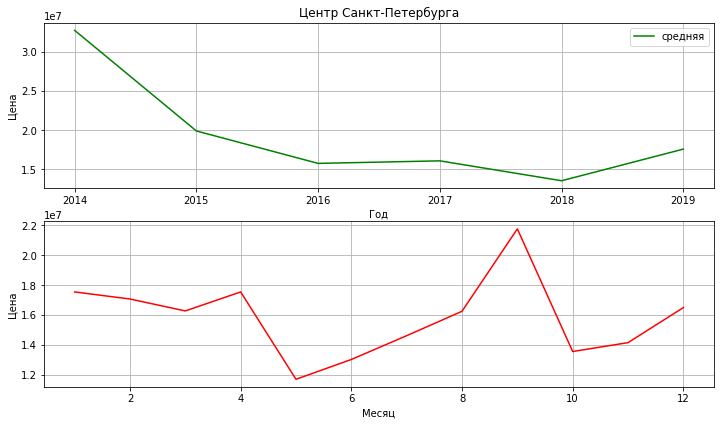

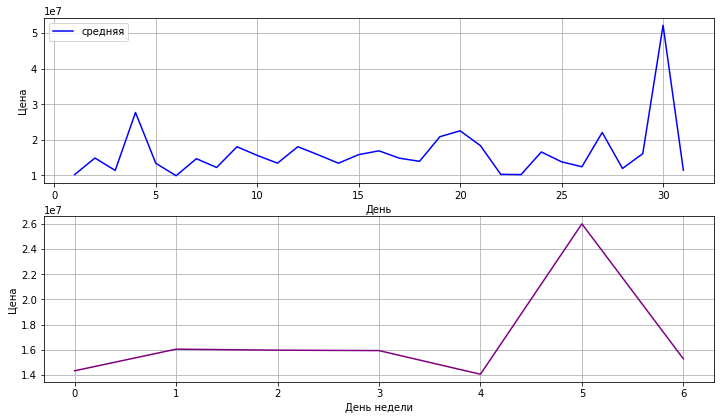

In [168]:
#Цены в зависимости от года
plt.figure(figsize=(12, 14))
plt.subplot(4, 1, 1)
plt.title('Центр Санкт-Петербурга')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.plot(centr_spb_date_year['year'], centr_spb_date_year['last_price'], color = 'green', label='средняя')
plt.grid(True)
plt.legend()

#Цены в зависимости от месяца
plt.subplot(4, 1, 2)
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.plot(centr_spb_date_month['month'], centr_spb_date_month['mean'], color = 'red', label='средняя')
plt.grid(True)

#Цены в зависимости от дня
plt.figure(figsize=(12, 14))
plt.subplot(4, 1, 3)
plt.xlabel('День')
plt.ylabel('Цена')
plt.plot(centr_spb_date_day['day'], centr_spb_date_day['mean'], color = 'blue', label='средняя')
plt.grid(True)
plt.legend()

#Цены в зависимости от дня недели
plt.subplot(4, 1, 4)
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.plot(centr_spb_date_weekday['weekday']\
         , centr_spb_date_weekday['mean'], color = 'purple', label='средняя')
plt.grid(True)

        В таблице centr_spb мы можем увидеть, что самая распространенная в продаже квартира является 3х комнатной, с высотой потолка 3,15 метра, площадью около 85 квадратных метров с ценой в 9,5 миллиона. 
        Представлен весь спектр квартир, есть и студии и очень большие квартиры, с колличеством комнат равным 19. Ранее мы уже разбирали зависимость цены от расстояния до центра, было выявлено, что чем дальше, тем цена меньше, присутствует резкий спад цены к 4м километрам от центра. 
        Видно как цена растет с увеличением комнат, но только до 5, далее идет спад. 
        Что касается зависимости цены от времени, то сохраняется общая структура, как и по Санкт-Петербургу в целом. Мы имеем общий спад цен к 2018 году. Если, смотреть на распределение цен внутри года, то конец весны и летний период цены в среднем ниже, а вот в сентябре и в новогодний период имеются пики роста цен. 

### Вывод

        Был проведен анализ объявлений о продаже квартир.
        - на первом этапе была произведена предобработка данных. Были выявлены и исправлены ошибки в записях, заполнены пропуски и стандартизированны данные в названиях населенных пунктов. 
        - Далее мы рассмотрели скорость продажи квартиры. Используя данные о продолжительности жизни объявления, было выявлено, что половина всех квартир продается за 95 дней, а среднее значение продажи равно 180 дням. К долгим продажам были отнесены квартиры, которые составляют 10% квантиль, он составляет от 460 дней. Присутствуют так же и очень быстрые продажи, так же их отнесли в 10% квантиль, это квартиры проданные менее чем за 18 дней. 
        -Далее были выявлены факторы влияющие на цену квартиры. Разбирался Санкт-Петербург отдельно от других населенных пунктов, так же был отделен центр Санкт-Петербурга от всего города и рассматривался отдельно. 
        Можем точно сказать, что не зависимо от местонахождения квартиры, на ее цену будут влиять:
        -общая площадь, чем она больше, тем выше цена.
        -этаж, заметно, как цена повышается вместе с этажом, в регионах этот рост более резкий.
        -Число комнат, выявилась интересная зависимость. Цена растет, в среднем, до 5 комнат по Санкт-Петербургу и 4 в других населенных пунктах. Далее квартиры начинают терять в цене.
        -расстояние до центра, яркое изменение цены представлено в Санкт-Петербурге, общая закономерность, что чем ближе к центру, тем цена выше. Но, в центре этот перепад очень резкий, особенно падение цен к 4 км от центра. 
        -Дата размещения. Наши данные начинаются с 2014 года. С 2014 по 2018 было общее падение цен на квартиры, сейчас наметился восходящий тренд. Цены на квартиры в конце весны и в летний период в среднем ниже, а вот осенью и в новогодний период имеет место быть повышение цен. 
        
        Используя эти данные можно ориентироваться в цене по городу и другим населенным пунктам. Можно дать совет, к примеру, покупать квартиру в летний период 11 - 12 числа месяца, а если квартира не продается уже более 420 дней, то быть настороже, так как с ней, возможно, что-то не так. 